In [2]:
'''Trains a Bidirectional LSTM on the IMDB sentiment classification task.
Output after 4 epochs on CPU: ~0.8146
Time per epoch on CPU (Core i7): ~150s.
'''

from __future__ import print_function
import numpy as np
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
max_features = 20000
maxlen = 100
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [4]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
#  return_sequences=True: 在所有步都产生输出
model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True)))
model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [6]:
class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def plot_loss(self, loss_type='epoch'):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc='upper right')
        plt.show()

history = LossHistory()

In [7]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=[x_test, y_test],
          callbacks=[history])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 570s 23ms/step - loss: 0.4076 - acc: 0.8089 - val_loss: 0.3540 - val_acc: 0.8454
Epoch 2/15
25000/25000 [==============================] - 517s 21ms/step - loss: 0.2222 - acc: 0.9145 - val_loss: 0.3821 - val_acc: 0.8407
Epoch 3/15
25000/25000 [==============================] - 527s 21ms/step - loss: 0.1186 - acc: 0.9569 - val_loss: 0.5192 - val_acc: 0.8381
Epoch 4/15
25000/25000 [==============================] - 547s 22ms/step - loss: 0.0610 - acc: 0.9792 - val_loss: 0.5722 - val_acc: 0.8239
Epoch 5/15
25000/25000 [==============================] - 549s 22ms/step - loss: 0.0424 - acc: 0.9856 - val_loss: 0.6640 - val_acc: 0.8306
Epoch 6/15
25000/25000 [==============================] - 561s 22ms/step - loss: 0.0279 - acc: 0.9902 - val_loss: 0.7126 - val_acc: 0.8276
Epoch 7/15
25000/25000 [==============================] - 561s 22ms/step - loss: 0.0166 - acc: 0.9945 - val

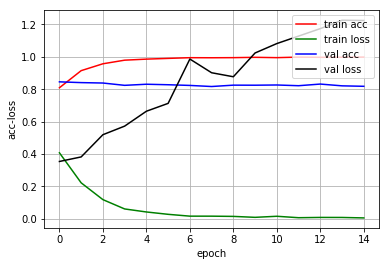

In [8]:
history.plot_loss('epoch')